# CARGA DE DATASET Y LIBRERIAS

## Importacion de Librerias

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Leemos el dataset original y traemos las tablas necesarias

In [12]:
df_hechos = pd.read_excel('homicidios.xlsx',sheet_name='HECHOS')

In [13]:
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

## Analizamos nulos y repetidos

### Tabla de `Hechos`

In [16]:
df_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   695 non-null    object        
 7   HH                     695 non-null    float64       
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

In [22]:
df_hechos['ID'].value_counts()

ID
2016-0001    1
2019-0050    1
2019-0042    1
2019-0043    1
2019-0044    1
            ..
2017-0111    1
2017-0112    1
2017-0113    1
2017-0114    1
2021-0097    1
Name: count, Length: 696, dtype: int64

#### En la tabla de Hechos, vemos que no se repiten los Id, por lo que cada uno representa un reporte individual, se presentan nulos, pero estos estan justificados ya que altura y cruce no se dan en todos los casos, las columnas de referencias geograficas van a ser reemplazadas por otro dataset que es aplicado directamente en Power BI


### Tabla de `Victimas`

In [19]:
df_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [21]:
df_victimas['ID_hecho'].value_counts()

ID_hecho
2017-0035    3
2017-0050    2
2016-0041    2
2018-0015    2
2020-0063    2
            ..
2017-0115    1
2017-0116    1
2017-0118    1
2017-0120    1
2021-0096    1
Name: count, Length: 696, dtype: int64

#### En la tabla de Victimas, vemos que se repiten los Id, esto se debe a que hay diferentes roles de victima a cada reporte, no se presentan nulos en esta tabla

## Leemos los CSV pasados por el ETL

In [6]:
df_hechos = pd.read_csv('Hechos.csv')

In [49]:
df_victimas = pd.read_csv('Victimas.csv')

## IDENTIFICACION DE VARIABLES SIGNIFICATIVAS

Verificamos las variables que parecen ser mas significativas. Checkamos el primer registro rapidamente

In [10]:
df_hechos.head(1)

,Id,Victimas,Fecha,Año,Mes,Dia,Hora,Franja_horaria,Tipo_de_via,Calle,Altura,Cruce,Comuna,Victima,Acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4.0,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,MOTO,AUTO


In [9]:
df_victimas.head(1)

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00


En un vistazo nos damos cuenta que la mayoria de las variables son categoricas.   
Analizamos las variables categoricas que parecen ser mas representativas usando graficas de barras de frecuencia horizontales, para corroborar cuales de ellas tienen por si mismas una mayor significancia  

In [21]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

In [12]:
print('columnas en df_homicidios_hechos_prepared: ','[' + ', '.join(df_hechos.keys()) + ']') 


columnas en df_homicidios_hechos_prepared:  [Id, Victimas, Fecha, Año, Mes, Dia, Hora, Franja_horaria, Tipo_de_via, Calle, Altura, Cruce, Comuna, Victima, Acusado]


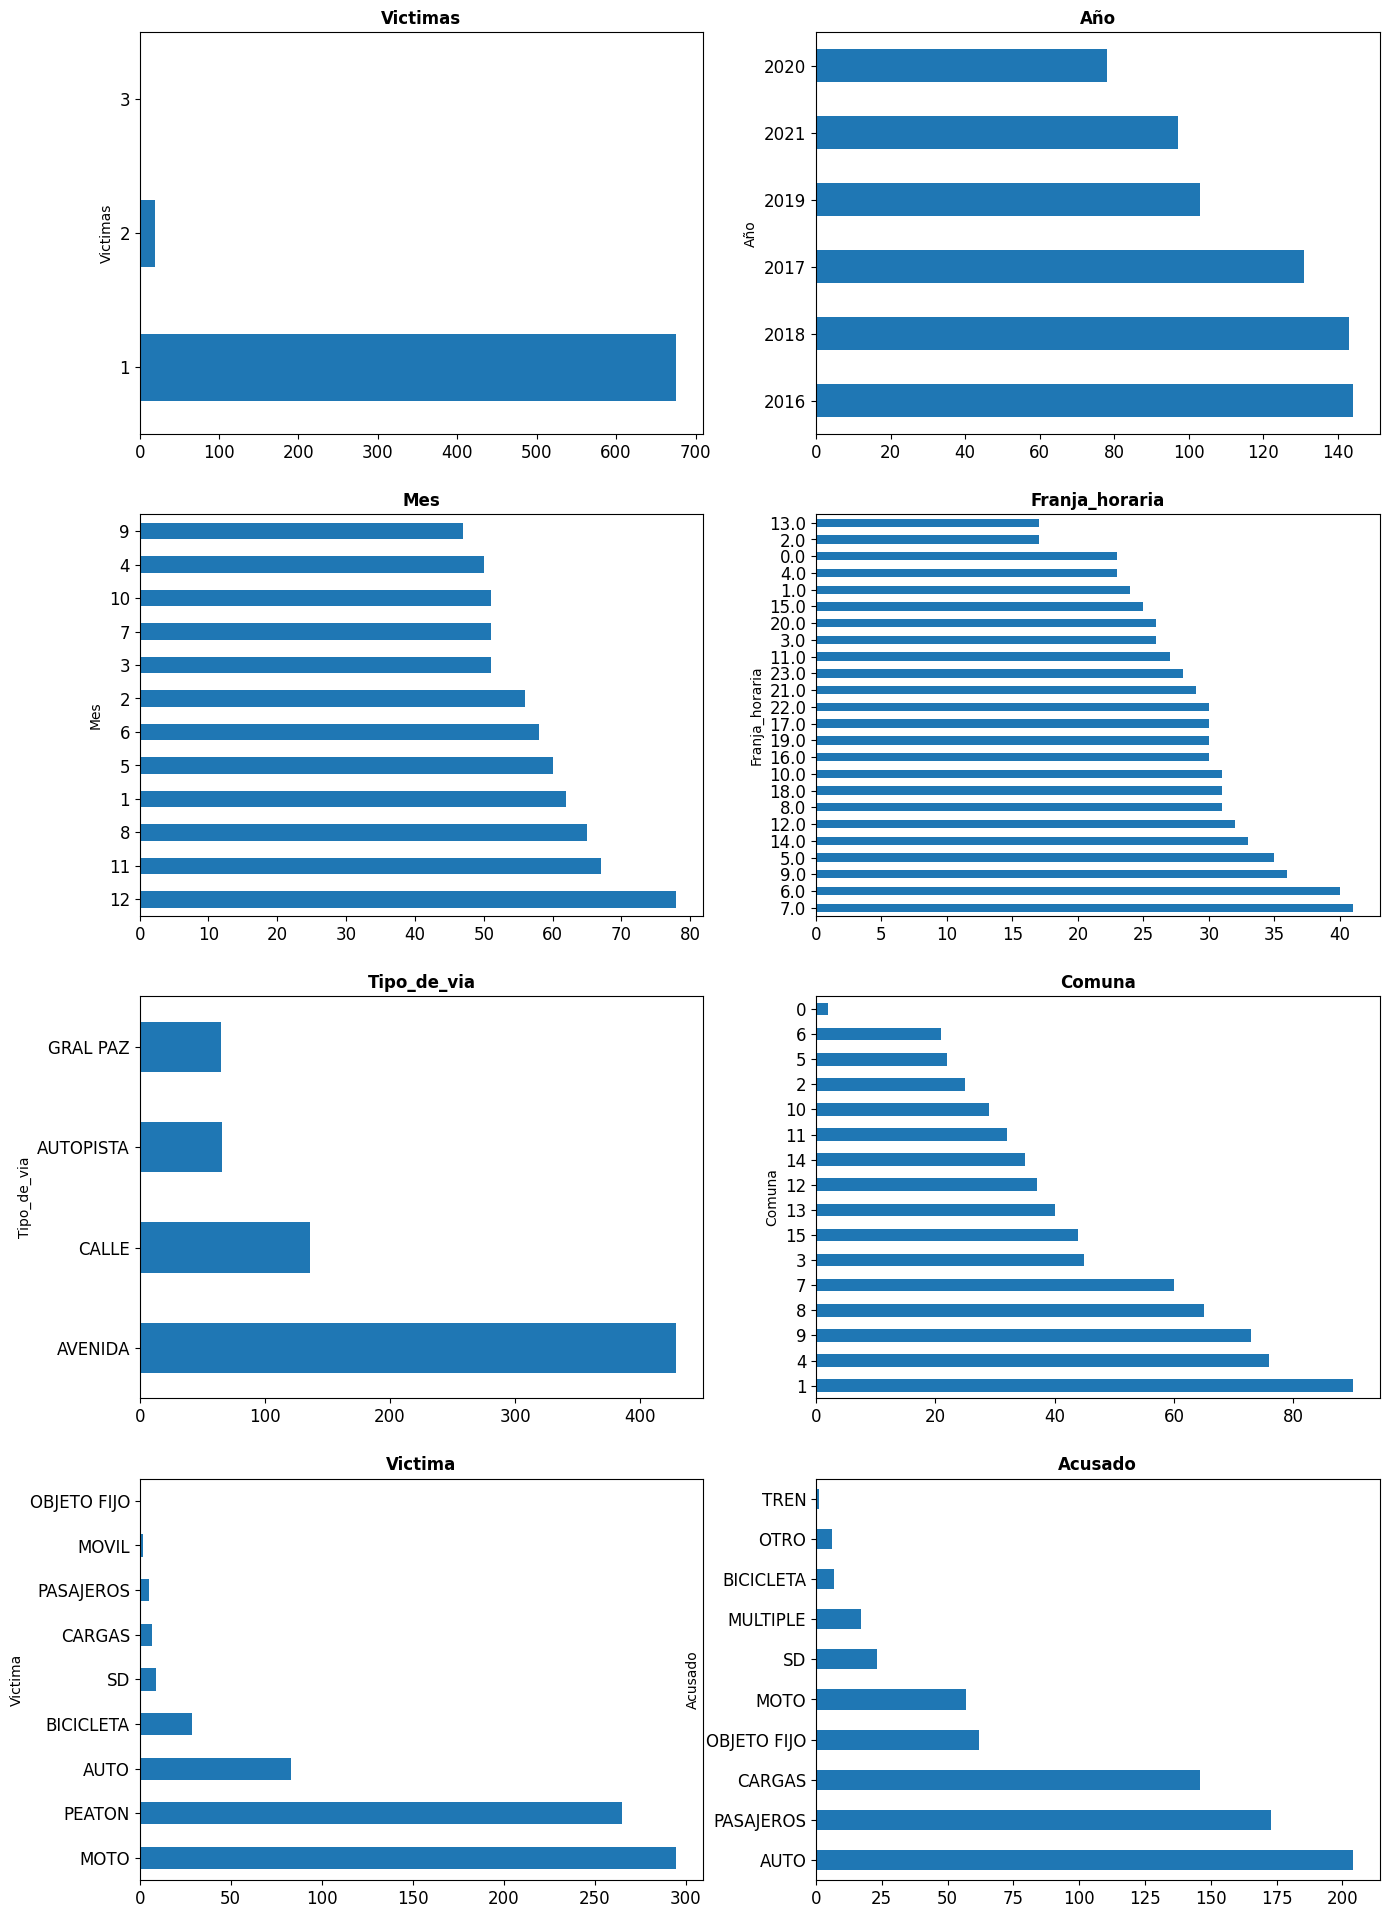

In [22]:
graficos_eda_categoricos(df_hechos[['Victimas', 'Año', 'Mes', 'Franja_horaria', 'Tipo_de_via', 'Comuna', 'Victima', 'Acusado']])

In [23]:
print('columnas en df_homicidios_hechos_prepared: ','[' + ', '.join(df_victimas.keys()) + ']') 

columnas en df_homicidios_hechos_prepared:  [Id, Fecha, Año, Mes, Dia, Rol, Victima, Sexo, Edad, Fallecimiento]


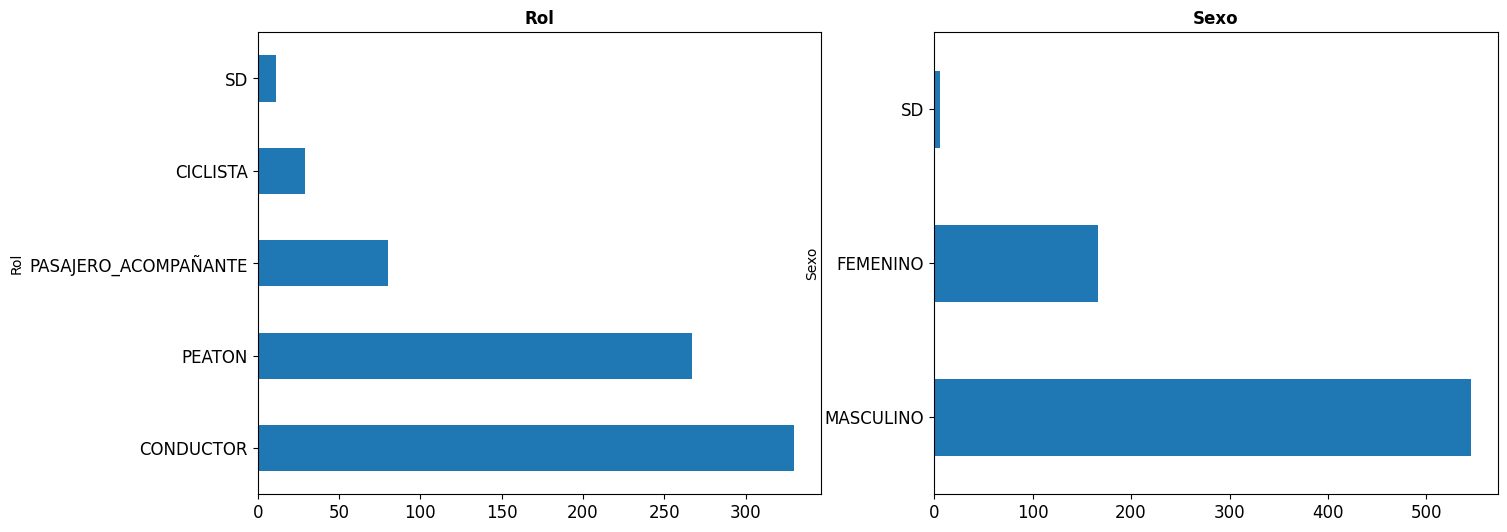

In [52]:
graficos_eda_categoricos(df_victimas[['Rol', 'Sexo']])

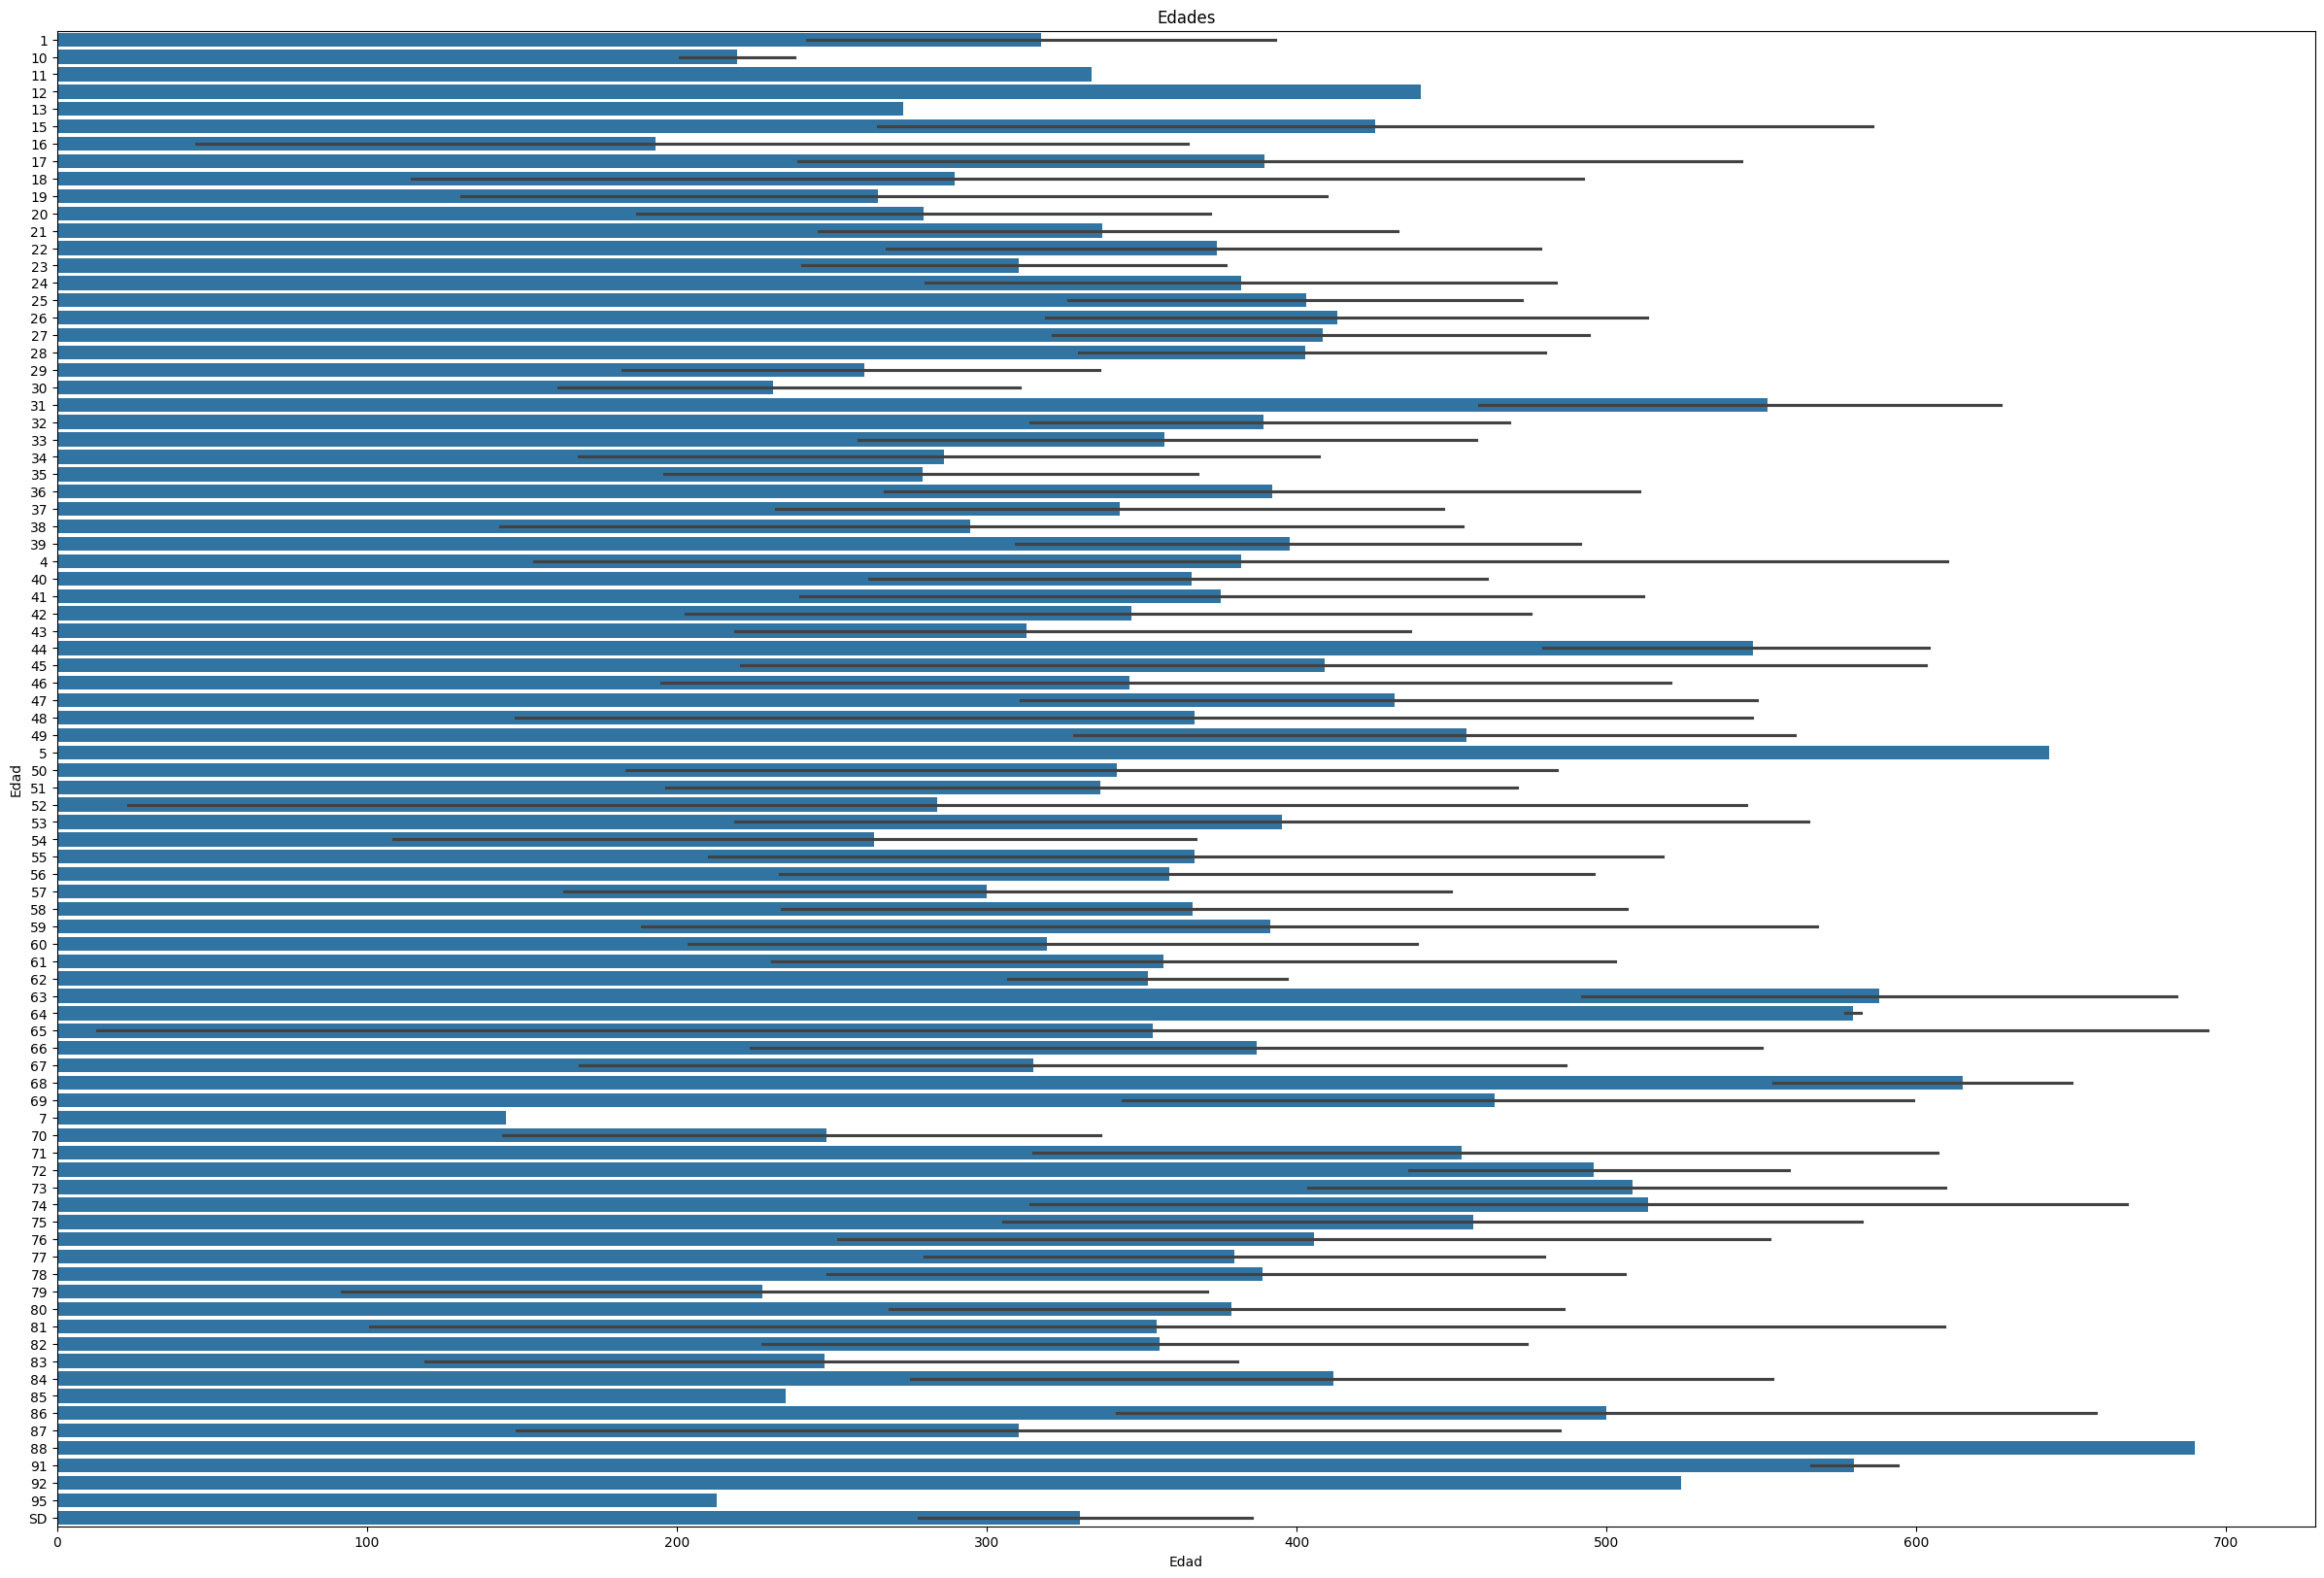

In [51]:
df_victimas_sorted = df_victimas['Edad'].sort_values()
plt.figure(figsize=(30, 20))
sns.barplot(df_victimas_sorted)
plt.title('Edades')
plt.xlabel('Edad')
plt.ylabel('Edad')
plt.show()

### Resultados del Analisis:
* Variables a ser analizadas: 
    * Año
    * Mes
    * Franja Horaria


    * Victimas
    * Tipo de Via
    * Comuna
    * Victima
    * Acusado
    * Año
    * Mes
    * Edad
    * Franja Horaria
    * Rol
    * Sexo

## Analisis de las variables individualmente

### Analisis de Siniestros por `Año`

In [63]:
muertes_año = df_hechos['Año'].value_counts().reset_index()
muertes_año.columns = ['Año', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Año': ['Total'], 'Siniestros': [total_siniestros]})
muertes_año = pd.concat([muertes_año, fila_total], ignore_index=True)
print(muertes_año)


     Año  Siniestros
0   2016         144
1   2018         143
2   2017         131
3   2019         103
4   2021          97
5   2020          78
6  Total         696


* El `Año` nos muestra la cantidad de siniestros por año y nos permite ver un paronama de como evolucionaron estadisticamente los accidentes.
    * El año 2018 muestra un aumento respecto a los dos años anteriores volviendo a bajar en 2019
    * Los años 2020 y 2021, nos muestra los datos de la cuarentena por la pandemia de COVID 19

### Analisis de Siniestros por `Mes`

In [56]:
muertes_mes = df_hechos['Mes'].value_counts().reset_index()
muertes_mes.columns = ['Mes', 'Siniestros']
muertes_mes

,Mes,Siniestros
0,12,78
1,11,67
2,8,65
3,1,62
4,5,60
5,6,58
6,2,56
7,3,51
8,7,51
9,10,51


#### Resultados del Analisis: 
Noviembre y Diciembre registran mas siniestros que el resto de meses, pero las diferencias no son amplias
No se verifican tendencias claras


### Analisis de Siniestros por `Franja_horaria`

In [67]:
muertes_franaja = df_hechos['Franja_horaria'].value_counts().reset_index()
muertes_franaja.columns = ['Franja', 'Siniestros']
total_siniestros = muertes_año['Siniestros'].sum()
fila_total = pd.DataFrame({'Franja': ['Total'], 'Siniestros': [total_siniestros]})
muertes_franaja = pd.concat([muertes_franaja, fila_total], ignore_index=True)
print(muertes_franaja)

   Franja  Siniestros
0     7.0          41
1     6.0          40
2     9.0          36
3     5.0          35
4    14.0          33
5    12.0          32
6     8.0          31
7    18.0          31
8    10.0          31
9    16.0          30
10   19.0          30
11   17.0          30
12   22.0          30
13   21.0          29
14   23.0          28
15   11.0          27
16    3.0          26
17   20.0          26
18   15.0          25
19    1.0          24
20    4.0          23
21    0.0          23
22    2.0          17
23   13.0          17
24  Total        2784


#### Resultados del Analisis:  
La hora del dia no muestra tendencias claras  
Podriamos afirmar que de 5 a 9 hs ocurrieron mas siniestros, pero los siniestros ocurridos a las 8 hs invalidan la tendencia  
Podriamos afirmar que de 0 a 4 hs ocurrieron menos siniestros, pero los siniestros ocurridos a las 3 hs invalidan la tendencia

### Analisis de Siniestros Viales en Tabla de Frecuencias Desagregada por Meses y Variables Afines

Observamos una tabla que compara las menores y las mayores ocurrencias de siniestros mes a mes  
Las variables computadas son
* Dia
* Dia de Semana
* Hora del Dia  
Centraremos nuestra atencion principalmente en los datos con lasmayores ocurrencias de siniestros

In [35]:
import pandas as pd
import calendar

# Supongamos que ya tienes cargado tu DataFrame df_homicidios_hechos_prepared.

# Define una función para obtener estadísticas de frecuencia por mes
def estadisticas_frecuencia_por_mes(mes):
    mes_nombre = calendar.month_name[mes]
    mes_df = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Mes'] == mes]
    


    dias_frecuencia_min = mes_df['Dia'].value_counts().idxmin()
    dias_frecuencia_max = mes_df['Dia'].value_counts().idxmax()
    
    dias_semana_frecuencia_min = mes_df['Dia de Semana'].value_counts().idxmin()
    dias_semana_frecuencia_max = mes_df['Dia de Semana'].value_counts().idxmax()
    
    horas_dia_frecuencia_min = mes_df['Hora del Dia'].value_counts().idxmin()
    horas_dia_frecuencia_max = mes_df['Hora del Dia'].value_counts().idxmax()
    
    return pd.DataFrame({
        'Mes': [mes_nombre],
        'Dia del Mes con Menos Siniestros:': [dias_frecuencia_min],
        'Día del mes con Mas Siniestros:': [dias_frecuencia_max],
        'Día de la Semana con Menos Siniestros:': [dias_semana_frecuencia_min],
        'Día de la Semana con Mas Siniestros:': [dias_semana_frecuencia_max],
        'Hora del Día con Menos Siniestros:': [horas_dia_frecuencia_min],
        'Horas del Día con Mas Siniestros:': [horas_dia_frecuencia_max] 
    })

# Ciclo a través de cada mes y obtén las estadísticas de frecuencia
resultados = []
for mes in range(1, 13):
    resultados.append(estadisticas_frecuencia_por_mes(mes))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)

# Establece el mes como índice
resultados_df.set_index('Mes', inplace=True)

# Muestra la tabla descriptiva de frecuencia
print('TABLA DE FRECUENCIAS MES A MES')
resultados_df


TABLA DE FRECUENCIAS MES A MES


,Dia del Mes con Menos Siniestros:,Día del mes con Mas Siniestros:,Día de la Semana con Menos Siniestros:,Día de la Semana con Mas Siniestros:,Hora del Día con Menos Siniestros:,Horas del Día con Mas Siniestros:
Mes,,,,,,
January,8,11,Jueves,Lunes,3,10
February,9,17,Lunes,Domingo,13,5
March,5,15,Sábado,Martes,4,18
April,1,27,Domingo,Viernes,5,9
May,13,9,Jueves,Martes,22,3
June,6,3,Miércoles,Jueves,18,23
July,1,10,Martes,Sábado,19,6
August,18,17,Martes,Viernes,22,8
September,26,2,Lunes,Viernes,16,14


#### Resultados del Analisis:
No se ven marcadas diferencias  
Excepto el dato del Dia Domingo, no seven valores que sobresalgan mucho del resto. Dicho esto:  
* En los meses de Abril, Octubre y Diciembre ocurrieron mas siniestros el dia Domingo
* En los meses de Febrero y Agosto ocurrieron mas siniestros el dia 17
* En los meses de Octubre y Noviembre ocurrieron mas siniestros el dia 25
* En los meses de Octubre y Setiembre ocurrieron mas siniestros el dia 14
* En los meses de Julio y Diciembre ocurrieron mas siniestros el dia 6

### Analisis de Siniestros por Comunas  


Computamos las frecuencias acumuladas de siniestros en las diferentes comunas 

In [38]:
# Calcula la suma acumulada de siniestros en comunas
suma = df_homicidios_hechos_prepared['Comuna'].value_counts().reset_index()

# Calcular la suma acumulada y agregarla como una nueva columna
suma['Suma Acumulada'] = suma['count'].cumsum()
suma

,Comuna,count,Suma Acumulada
0,1,90,90
1,4,76,166
2,9,73,239
3,8,65,304
4,7,60,364
5,3,45,409
6,15,44,453
7,13,40,493
8,12,37,530
9,14,35,565


Computamos los decesos desagregados por años y comunas

In [39]:
import pandas as pd


# Filtrar los años que te interesan (2016-2021)
#df_filtered = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Año'].between(2016, 2021)]

# Crear la tabla dinámica (pivot table) para sumar los valores por comuna y año
pivot_df = pd.pivot_table(df_homicidios_hechos_prepared, index='Comuna', columns='Año', values='Nro de Victimas', aggfunc='sum')
#pivot_df = pd.pivot_table(df_homicidios_hechos_prepared, index='Comuna', columns='Año', values='Nro de Victimas', aggfunc='sum')

# Reiniciar el índice para obtener una estructura de datos más estándar
#pivot_df = pivot_df.reset_index()

# Mostrar el DataFrame resultante
pivot_df


Año,2016,2017,2018,2019,2020,2021
Comuna,,,,,,
0,1.0,NaN,NaN,NaN,NaN,NaN
1,22.0,20.0,20.0,12.0,10.0,9.0
2,1.0,6.0,7.0,2.0,5.0,4.0
3,8.0,6.0,12.0,2.0,10.0,8.0
4,16.0,17.0,17.0,12.0,4.0,13.0
5,3.0,3.0,4.0,5.0,3.0,4.0
6,3.0,7.0,3.0,2.0,2.0,5.0
7,11.0,12.0,16.0,11.0,6.0,6.0
8,20.0,14.0,12.0,7.0,7.0,7.0


Graficamos el historico de decesos en cada comuna  

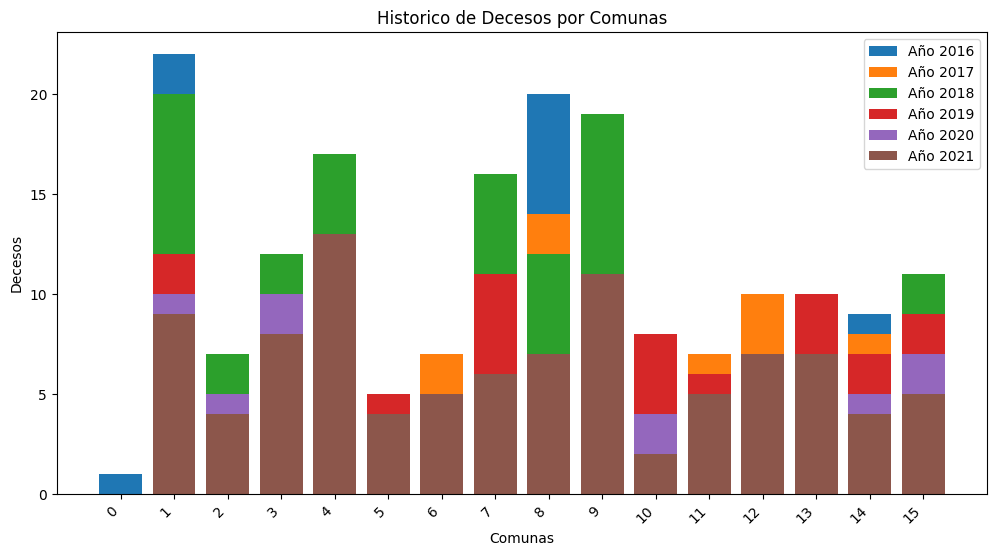

In [40]:
import matplotlib.pyplot as plt


# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Iterar a través de las columnas de años en pivot_df y trazar barras para cada comuna
for year in range(2016, 2022):
    plt.bar(pivot_df.index, pivot_df[year], label=f'Año {year}')




# Configurar etiquetas y título
plt.xlabel('Comunas')
plt.ylabel('Decesos')
plt.title('Historico de Decesos por Comunas')

# Mostrar leyenda
plt.legend()

# Establecer manualmente las etiquetas del eje x con todas las comunas
#plt.xticks(range(len(pivot_df['Comuna'])), pivot_df['Comuna'], rotation=45, ha='right')
plt.xticks(range(len(pivot_df.index)), pivot_df.index, rotation=45, ha='right')

# Mostrar el gráfico
plt.show()


#### Resultados del Analisis:  
Se verifica que ciertas comunas acaparan la mayor cantidad de siniestros.
De las 15 comunas, cinco (1, 4, 9, 8 y 7) de ellas se contabilizan mas de la mitad de siniestros: 364  
El año y la comuna con mas siniestros es 2016 y Comuna 1: 22 
En 2017 y 2018 tambien en Comuna 1 se registraron mas siniestros: 20 en cda año 

### Analisis de Siniestros en: 'Tipo de Calle' 'Vehiculo del Acusado' 'Vehiculo de la Victima'


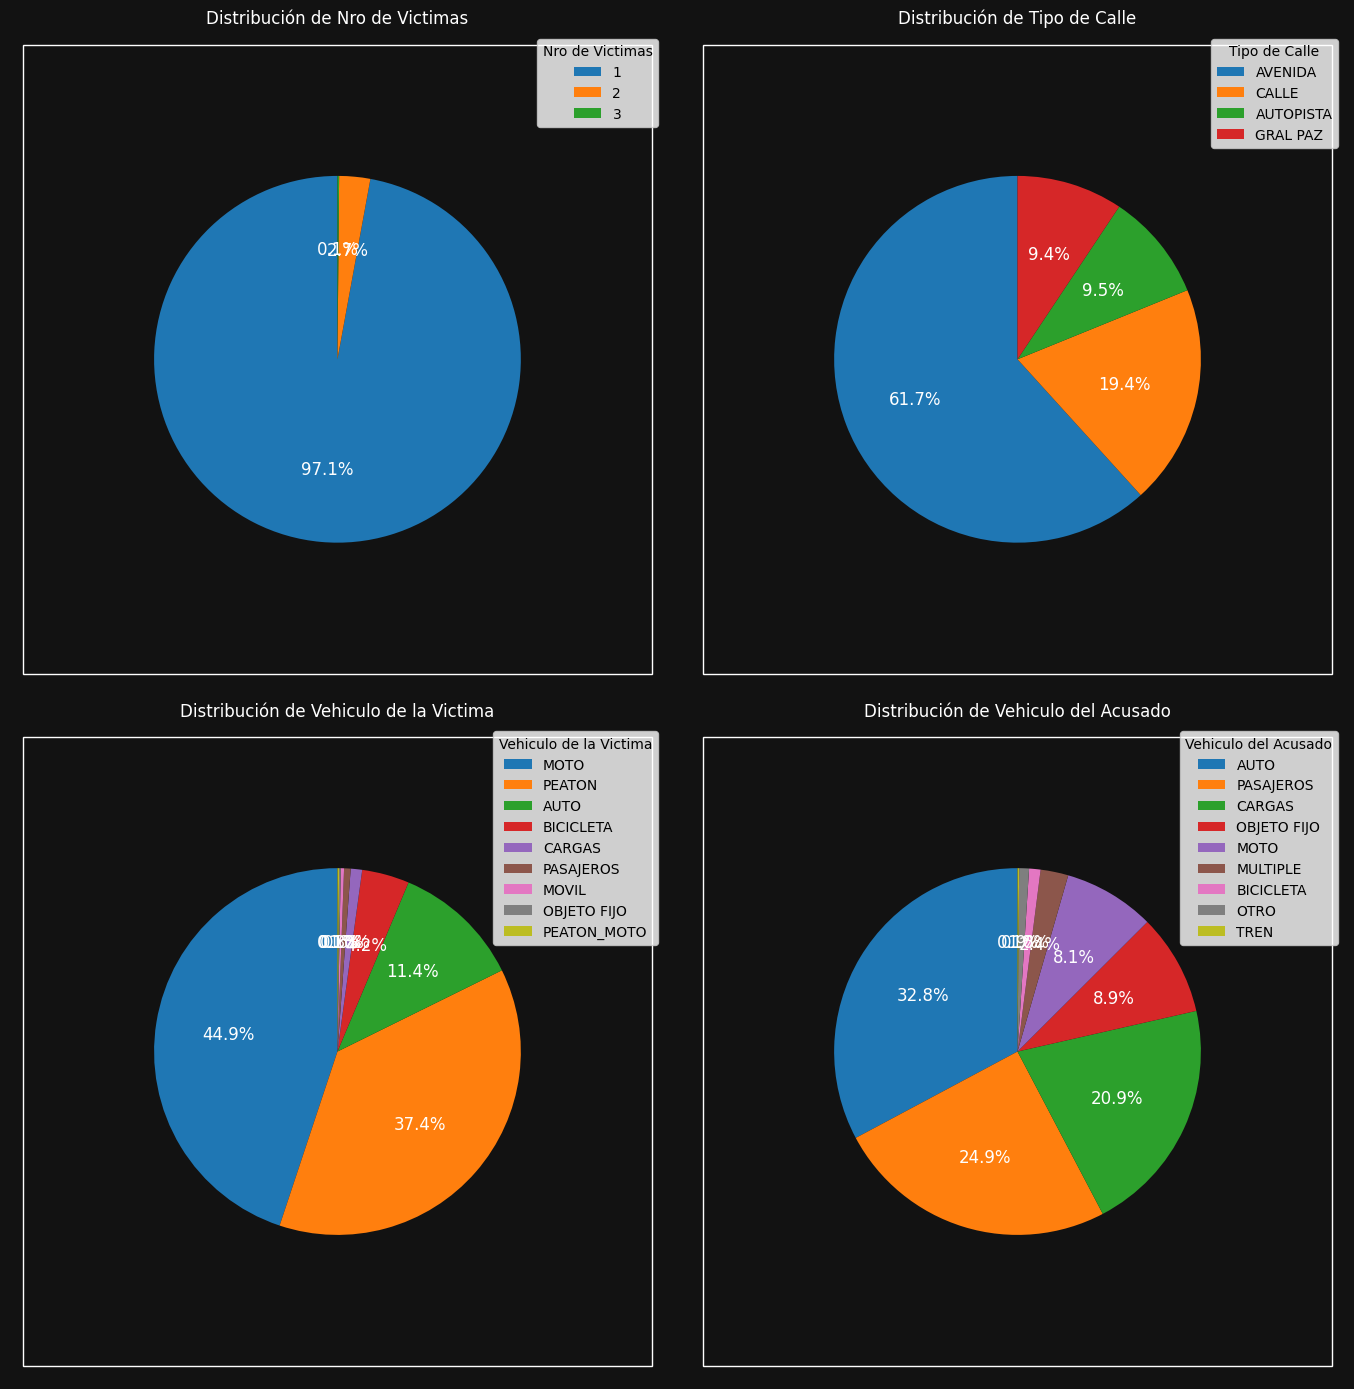

In [42]:
# Lista de columnas que deseas graficar
columnas_a_graficar = ['Nro de Victimas', 'Tipo de Calle', 'Vehiculo de la Victima', 'Vehiculo del Acusado']

# Crear una figura con 2 filas y 2 columnas para los gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
#plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(wspace=0.3) 
fig.patch.set_facecolor('#121212')  # Cambiar el color de fondo a un tono oscuro

# Ajustar manualmente la posición de los subplots para reducir la separación horizontal
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95, wspace=0.2, hspace=0.3)
# Iterar a través de las columnas y generar los gráficos de pastel
for i, columna in enumerate(columnas_a_graficar, 0):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    # Extraer los datos de la columna
    datos = df_homicidios_hechos_prepared[columna].value_counts()

    # Crear un gráfico de pastel para la columna actual
    wedges, texts, autotexts = ax.pie(datos, autopct='%1.1f%%', startangle=90, textprops={'color': 'white', 'fontsize': 12}, radius=0.7)
    ax.set_title(f'Distribución de {columna}', color='white')

    # Agregar una leyenda al subplot
    ax.legend(datos.index, title=columna, loc="best", fontsize=10) #, loc="center right", bbox_to_anchor=(1.2, 0.5)

    # Dibujar un rectángulo alrededor del subplot
    rect = plt.Rectangle((-1.2, -1.2), 2.4, 2.4, linewidth=1, edgecolor='white', fill=False)
    ax.add_patch(rect)

# Ajustar el espaciado entre los gráficos y el título
plt.tight_layout()
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


#### Resultados del Analisis:
La mayor cantidad de siniestros se produjeron en avenidas: 61%  
El tipo de vehiculo causante de mas siniestro fue el auto (32.8%) seguido de los de pasajeros (24.9%)  
El tipo de vehiculo que padecio de mas siniestro fue el moto (44.9%), seguido de los peatones (37.4%)  

### Analisis de Siniestros Viales en Tabla de Frecuencias Desagregada por Comunas y Vias de Transito

Observamos una tabla que compara por comunas las calle con mayores ocurrencias de siniestros  
Las variables computadas son
* Calle en que ocurrio el siniestro
* Tipo de Via de la Calle
Centraremos nuestra atencion principalmente en los datos con lasmayores ocurrencias de siniestros

In [43]:
# Supongamos que ya tienes cargado tu DataFrame df_homicidios_hechos_prepared.

# Define una función para obtener estadísticas de frecuencia por mes
def estadisticas_frecuencia_por_comunas(comuna):
    #comuna_nombre = calendar.month_name[comuna]
    comuna_df = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Comuna'] == comuna]
       
    via_frecuencia_max = comuna_df['Calle'].value_counts().idxmax()
    via_frecuencia_max_count = comuna_df['Calle'].value_counts()[0]
    #via_frecuencia_max_count1 = comuna_df['Calle'].value_counts().idxmax()[0]
    via_frecuencia_max_tipo_calle = df_homicidios_hechos_prepared[df_homicidios_hechos_prepared['Calle'] == via_frecuencia_max]['Tipo de Calle'].str.strip('[]').unique()
    
    return pd.DataFrame({
        'Comuna': [comuna],
        'Via con Mas Siniestros:' : [via_frecuencia_max],
        'Cantidad de Siniestros:' : [via_frecuencia_max_count],
        'Tipo de Calle:' : [via_frecuencia_max_tipo_calle],
        #'Cuenta1:' : [via_frecuencia_max_count1],
        #'Día de la Semana con Menos Siniestros:': [dias_semana_frecuencia_min],
        #'Día de la Semana con Mas Siniestros:': [dias_semana_frecuencia_max],
        #'Hora del Día con Menos Siniestros:': [horas_dia_frecuencia_min],
        #'Horas del Día con Mas Siniestros:': [horas_dia_frecuencia_max] 
    })

# Ciclo a través de cada mes y obtén las estadísticas de frecuencia
resultados = []
for comuna in range(0, 16):
    resultados.append(estadisticas_frecuencia_por_comunas(comuna))

# Convierte los resultados en un DataFrame
resultados_df = pd.concat(resultados)

# Establece el mes como índice
resultados_df.set_index('Comuna', inplace=True)

# Muestra la tabla descriptiva de frecuencia
print('TABLA DE FRECUENCIAS POR COMUNAS')
resultados_df


TABLA DE FRECUENCIAS POR COMUNAS


,Via con Mas Siniestros:,Cantidad de Siniestros:,Tipo de Calle:
Comuna,,,
0,AUTOPISTA 25 DE MAYO,1,[AUTOPISTA]
1,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,6,[AUTOPISTA]
2,CORDOBA AV.,4,[AVENIDA]
3,RIVADAVIA AV.,4,[AVENIDA]
4,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,8,[AUTOPISTA]
5,"SALGUERO, JERONIMO",2,"[AVENIDA, CALLE]"
6,DIRECTORIO AV.,3,[AVENIDA]
7,RIVADAVIA AV.,7,[AVENIDA]
8,"PAZ, GRAL. AV.",15,[GRAL PAZ]


##### Resultados del Analisis:
Podemos inferir informacion pertinente: 
* En las comunas 8, 9, 11 y 12, la Gral Paz es la via con mas siniestros
* De todas las vias de la ciudad, en la Gral Paz ocurrieron la mayor cantidad de siniestros: 52 ocurrencias 

# RESULTADOS OBTENIDOS

## Resumen de Insights Encontrados:  

**Sobre el Nro de Victimas**  
* Mas del 97% de los siniestros causaron la muerte de solo una persona
* Observacion: se muestra una tendecia clara en el numero de muertes que se produjeron an cada siniestro  
<br/>
  
**Sobre los Tipos de Vehiculos Involucrados en SIniestos Viales**
* El tipo de vehiculo causante de mas siniestro fue el auto (32.8%) seguido de los de pasajeros (24.9%)
* El tipo de vehiculo que padecio de mas siniestro fue el moto (44.9%), seguido de los peatones (37.4%)
* Observacion: se muestra una tendecia clara sobre los vehiculos involucrados en siniestros  
 <br/>

**Sobre las Comunas de Buenos Aires**  
* Hay concentracion de siniestros en las comunas de las zonas del Centro-Sur y Este de la ciudad, con mayor preponderancia en esta ultima zona
* Se verifica que ciertas comunas acaparan la mayor cantidad de siniestros.
* De las 15 comunas, en cinco (1, 4, 9, 8 y 7) de ellas se contabilizan mas de la mitad de siniestros: 364
* En el 2016, fue en la Comuna 1 donde ocurrieron la mayor cantidad de siniestros: 22
* En 2017 y 2018 tambien en Comuna 1 se registraron mas siniestros: 20 en cada año  
<br/>

**Sobre los Tipos de Vias de Transito en que Ocurrieron Siniestros**
* En las comunas 8, 9, 11 y 12, la Gral Paz es la via con mas siniestros
* De todas las vias de la ciudad, en la Gral Paz ocurrieron la mayor cantidad de siniestros: 52 ocurrencias 
* La mayor cantidad de siniestros se produjeron en avenidas: 61%  
<br/>

**Sobre los Siniestros Organizados por Meses del Año**
* Noviembre y Diciembre registran mas siniestros que el resto de meses, pero las diferencias no son amplias
* Observacion: El mes del año no parece ser una variable que brinde algun factor a tomar en cuenta pues no se verifican tendencias claras.  
<br/>

**Sobre el Año en que Ocurrio el Siniesto**
* De los años registrados, en el 2016 ocurrieron la mayor cantidad de siniestros con 145, seguido por el año 2017 con 140 ocurrencias
* Si bien la cantidad de siniestros se ha ido reduciendo en los ultimos años, hubo un rebote en el año 2018 que impide afirmar una tendencia clara de reduccion de siniestros, aunque 2020 y 2021 debido a la pandemia, los numeros bajaron en catidad de peatones y autos, pero las motos se mantienen en un pico alto. 
 